<a href="https://colab.research.google.com/github/belugarose/gbdt/blob/master/gbdt_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [3]:
X = np.arange(1, 11)
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05])

采用MSE作为损失函数，并且将树的深度设为1，决策树个数设为5，其他参数使用默认值

In [5]:
gbdt = GradientBoostingRegressor(n_estimators=5, max_depth=1)
gbdt.fit(X.reshape(-1, 1), y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

[Text(167.4, 163.07999999999998, 'X[0] <= 6.5\nfriedman_mse = 1.911\nsamples = 10\nvalue = -0.0'),
 Text(83.7, 54.360000000000014, 'friedman_mse = 0.31\nsamples = 6\nvalue = -1.07'),
 Text(251.10000000000002, 54.360000000000014, 'friedman_mse = 0.018\nsamples = 4\nvalue = 1.605')]

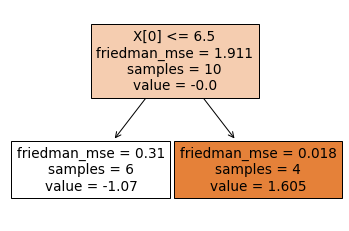

In [11]:
tree.plot_tree(gbdt[0,0], filled=True)

以下是根据GBDT**回归算法**原理的分布拆解

In [12]:
y - y.mean()

array([-1.747, -1.607, -1.397, -0.907, -0.507, -0.257,  1.593,  1.393,
        1.693,  1.743])

对于这组残差拟合第一棵树。根据所给的数据，可以考虑的切分点为1.5～9.5.分别计算y-F(x1)的值，并计算出切分后的左右两侧加和MSE最小的切分，最后得到的是6.5

In [16]:
print((y-y.mean())[:6].mean(), (y-y.mean())[6:10].mean())
print(((y-y.mean())**2).mean(), ((y[:6]-y[:6].mean())**2).mean(), ((y[6:10]-y[6:10].mean())**2).mean())

-1.0703333333333338 1.6054999999999997
1.9114210000000003 0.30968888888888885 0.017968750000000124
